p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 10: Custom statistical test, P_val:0.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 10: Kruskal-Wallis paired samples with Bonferroni correction, P_val=8.572e-20 stat=8.291e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 10: Kruskal-Wallis paired samples with Bonferroni correction, P_val=2.266e-31 stat=1.357e+02


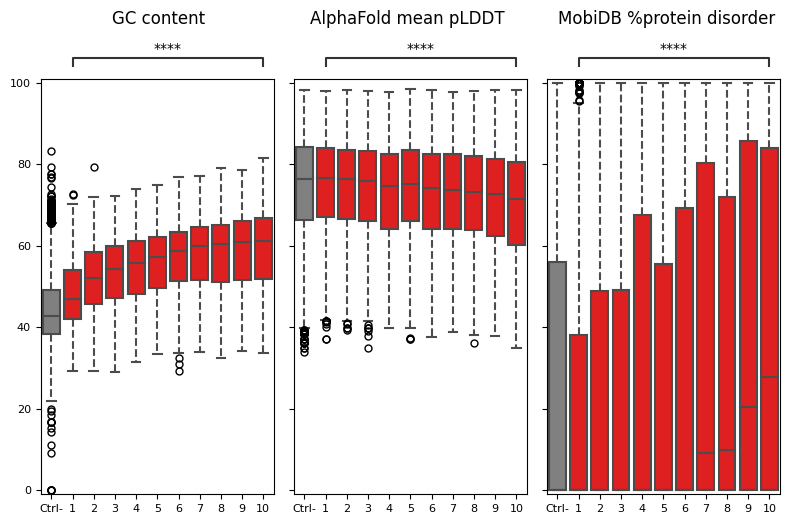

In [12]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# Use Type 42 fonts for PDFs
matplotlib.rcParams['pdf.fonttype'] = 42

### load neg data
id_neg_hg = []
with open("/mnt/project/exonhancer/ZENODO_REPO/Control_selection/control_neg_NoTF_NoTSS_TES_prom.tsv") as file:
    for line in file:      
        id_neg_hg.append(line.strip().split("\t")[3])

neg_gc_hg = []
neg_disorder_hg = []
neg_plddt_hg = []
with open("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/structural_properties/gc_perc/gc_perc_neg_dic_hg.tsv") as file:
    for line in file:      
        if line.strip().split("\t")[1] != "NA":
            neg_gc_hg.append(float(line.strip().split("\t")[1]))
with open("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/structural_properties/mobidb/hsap/neg_disorder_perc_hg38.tsv") as file:
    for line in file:      
        if line.strip().split("\t")[1] != "NA":
            neg_disorder_hg.append(float(line.strip().split("\t")[1]))
with open("/mnt/project/exonhancer/ZENODO_REPO/Conservation_and_structure/structural_properties/alphafold_plddt/hsap/ee_neg_plddt_mean_score_hg.tsv") as file:
    for line in file:      
        if line.strip().split("\t")[1] != "NA" and  line.strip().split("\t")[0] in id_neg_hg:
            neg_plddt_hg.append(float(line.strip().split("\t")[1]))

### Load your data
df1 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_hg38.tsv", sep='\t', header=0)



# Define columns of interest and control data
columns_of_interest = ['GC%', 'Mean_alphafold_pLDDT', 'MobiDB_disorder%']
control_data = [neg_gc_hg, neg_plddt_hg, neg_disorder_hg]

# Create figure
fig, axes = plt.subplots(1, 3, figsize=(8, 5), sharey=True)

# Loop through each feature (column)
for col_idx, (column, control) in enumerate(zip(columns_of_interest, control_data)):
    ax = axes[col_idx]

    # Prepare your main dataset
    data_main = df1[['GroupByTF', column]].dropna()
    data_main["GroupByTF"] = pd.to_numeric(data_main["GroupByTF"])
    data_main[column] = pd.to_numeric(data_main[column])

    # Create a DataFrame for the control group
    df_control = pd.DataFrame({
        'GroupByTF': ['Ctrl-'] * len(control),
        column: control
    })

    # Concatenate the control and main data
    data_combined = pd.concat([df_control, data_main])

    # Create boxplot
    sns.boxplot(
        data=data_combined,
        x='GroupByTF',
        y=column,
        palette=['gray'] + ['red']*10,  # first box gray, others red
        ax=ax,
        showfliers=True,
        linewidth=1.5,
        whiskerprops={'linestyle': '--'},
        flierprops={
            'marker': 'o',
            'markerfacecolor': 'none',
            'markeredgecolor': 'black',
            'markersize': 5
        },
        order=['Ctrl-'] + list(range(1, 11))  # Control box first, then 1-10
    )

    # Formatting
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_ylim(-1, 101)
    ax.set_title(None)

    # Add statistical annotations
    box_pairs = [(1, 10)]
    if column == "GC%":
        add_stat_annotation(
            ax, data=data_combined, x='GroupByTF', y=column,
            box_pairs=box_pairs,
            order=['Ctrl-'] + list(range(1, 11)),
            test=None,
            pvalues=[0],  # customize accordingly
            perform_stat_test=False,
            text_format='star',
            loc='outside'
        )
    else:
        add_stat_annotation(
            ax, data=data_combined, x='GroupByTF', y=column,
            box_pairs=box_pairs,
            order=['Ctrl-'] + list(range(1, 11)),
            test='Kruskal',
            text_format='star',
            loc='outside'
        )

# Add figure labels
fig.text(0.205, 1.01, "GC content", ha='center', fontsize=12)
fig.text(0.515, 1.01, "AlphaFold mean pLDDT", ha='center', fontsize=12)
fig.text(0.84, 1.01, "MobiDB %protein disorder", ha='center', fontsize=12)

plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/main_figures/fig7/GC_pLDTT_disorder_by_decile_hg.pdf", format="pdf", bbox_inches="tight", dpi=450)

plt.show()


In [ ]:
### Kruskal wallis test for all groups 
#GC
from scipy.stats import kruskal
import pandas as pd 
import numpy as np 

df1 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_hg38.tsv", sep='\t', header=0)
data1 = df1[["GroupByTF", 'GC%']].dropna()
group_data = [data1[data1['GroupByTF'] == g]['GC%'] for g in range(1, 11)]
stat, p_value = kruskal(*group_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

### Kruskal wallis test for all groups 
#Mean_alphafold_pLDDT
from scipy.stats import kruskal
import pandas as pd 
import numpy as np 

df1 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_hg38.tsv", sep='\t', header=0)
data1 = df1[["GroupByTF", 'Mean_alphafold_pLDDT']].dropna()
group_data = [data1[data1['GroupByTF'] == g]['Mean_alphafold_pLDDT'] for g in range(1, 11)]
stat, p_value = kruskal(*group_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

### Kruskal wallis test for all groups 
#MobiDB_disorder%
from scipy.stats import kruskal
import pandas as pd 
import numpy as np 

df1 = pd.read_csv("/home/mouren/Data/final_files_tokeep/notes/species_cara_bilan/bilan_ee_caracteristique_hg38.tsv", sep='\t', header=0)
data1 = df1[["GroupByTF", 'MobiDB_disorder%']].dropna()
group_data = [data1[data1['GroupByTF'] == g]['MobiDB_disorder%'] for g in range(1, 11)]
stat, p_value = kruskal(*group_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic: 1754.2944160302206, p-value: 0.0
Kruskal-Wallis H-statistic: 1190.1413595548995, p-value: 1.6292611181141932e-250
Kruskal-Wallis H-statistic: 481.5622783410245, p-value: 5.086824604907018e-98
Kruskal-Wallis H-statistic: 332.28414288296494, p-value: 3.6361312794011113e-66
